In [353]:
#Social_Network_Ads.csv

**Importing the libraries**

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
import graphviz

**Importing the dataset**

In [355]:
df=pd.read_csv('/content/drive/MyDrive/Task7/Assignment11_to_16/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [356]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [357]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [358]:
#check missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [359]:
#encoding
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [360]:
#feature and target
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [361]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [362]:
y_train.value_counts()

0    184
1     96
Name: Purchased, dtype: int64

**Feature Scaling**

**Fitting Random Forest to the Training set**

In [363]:
randomforest=RandomForestClassifier(random_state=0,n_jobs=-1,class_weight='balanced')

In [364]:
selector=SelectFromModel(randomforest,threshold=0.3)

In [365]:
important_feature=selector.fit_transform(x,y)
x=pd.DataFrame(important_feature,columns=['Age','EstmatedSalary'])
x_columns=list(x.columns)
y_columns=['Not Purchased','Purchased']

In [366]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [367]:
randomforest.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

**Predicting the Test set results**

In [368]:
y_pred=randomforest.predict(x_test)

In [369]:
print('Model accuracy score with Gender feature removed','{:.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with Gender feature removed 0.9083


**Making the Confusion Matrix**

In [370]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[66,  7],
       [ 4, 43]])

**Classification Result**

In [371]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        73
           1       0.86      0.91      0.89        47

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



**Visualising the Training set results**

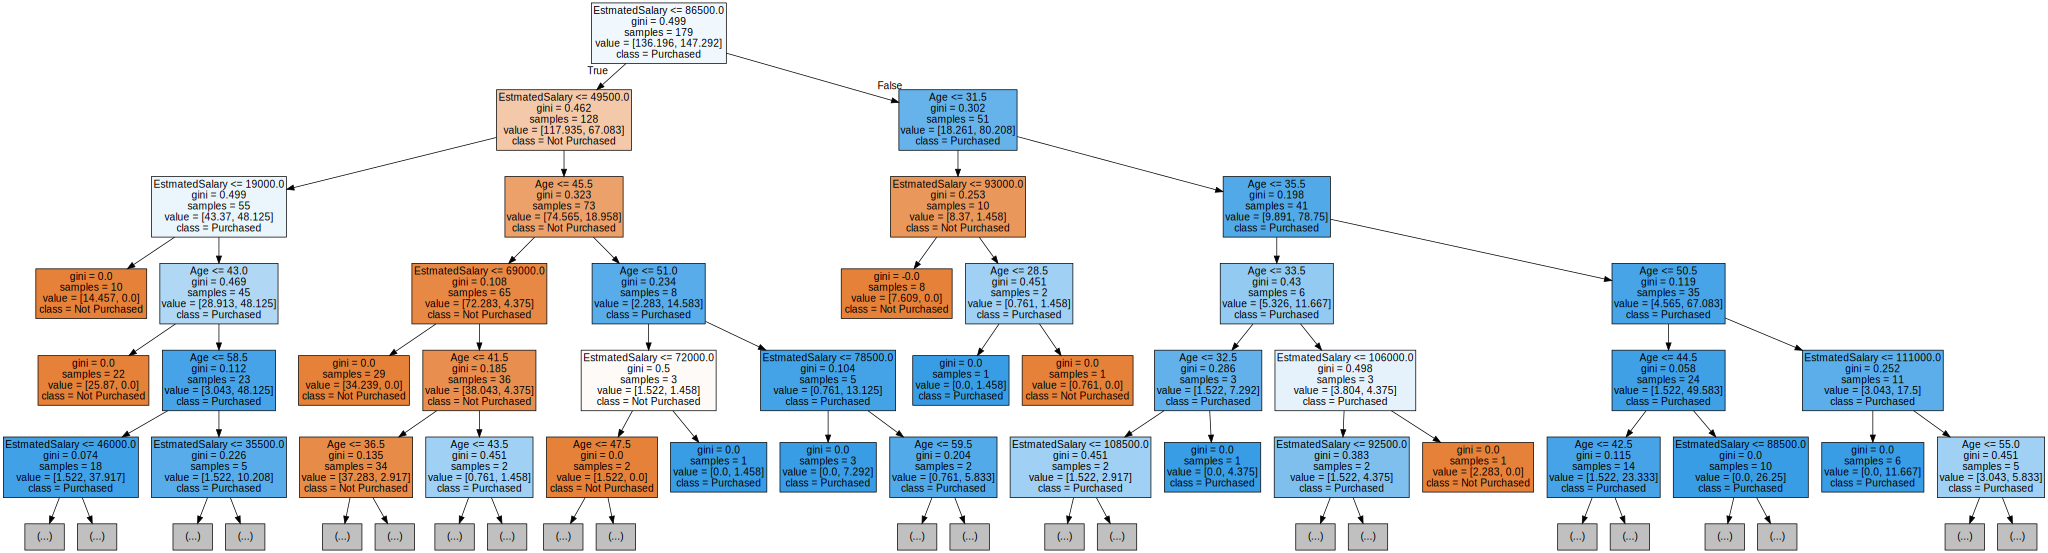

In [372]:
visual=tree.export_graphviz(randomforest.estimators_[99],feature_names=x_columns,class_names=y_columns,max_depth=5,filled=True)
graphviz.Source(visual,format='png')

**Visualising the Test set results**

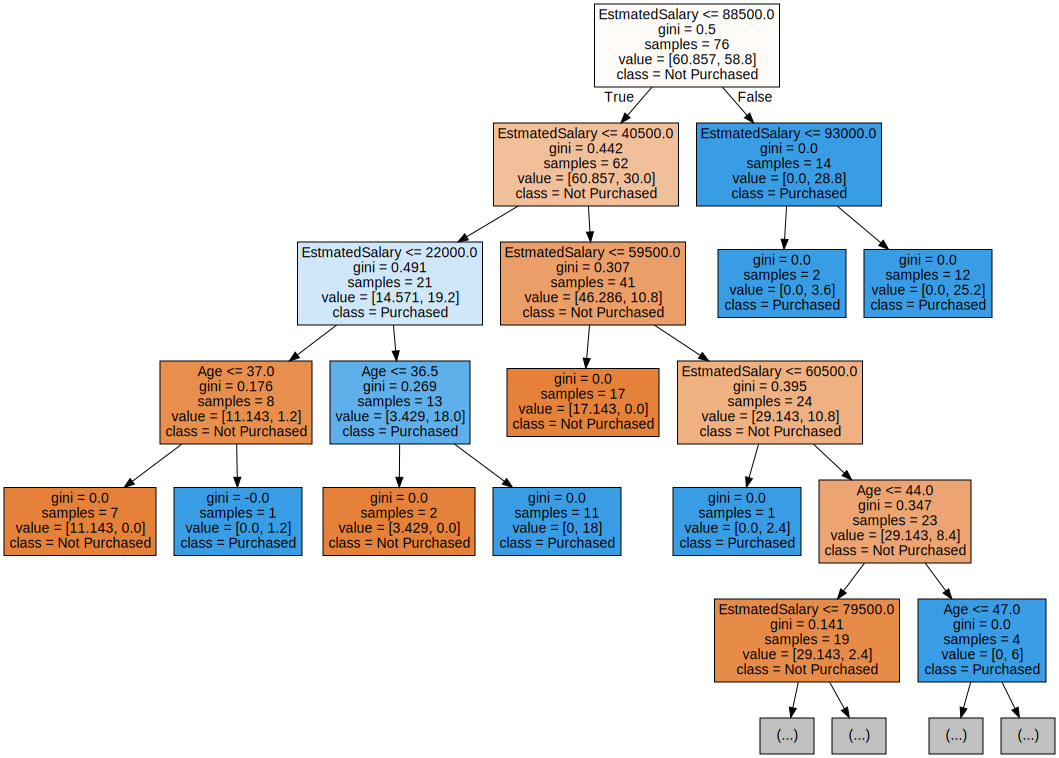

In [373]:
visual=tree.export_graphviz(randomforest.fit(x_test,y_pred).estimators_[99],feature_names=x_columns,class_names=y_columns,max_depth=5,filled=True)
graphviz.Source(visual,format='png')

**Result and Conclusion**







*   In this project, I build a Random Forest Classifier to predict the user
  will purchased or not.

*  The model accuracy score with 10 decision-trees is 0.9083 .

*  I have used the Random Forest model to find only the important features so i used selector, build the model using these features and see its effect on accuracy.

*  Selector removed the Gender variable from the model, so the accuracy score is 0.9083. 

*  At last i provide the Confusion matrix , classification report . finally train and test data visualized.

